## Package Testing

This notebook serves to test the installation and methods of the functional_depth_methods package

In [2]:
!pip install ..
!pip list | grep statdepth

Processing /Users/julian/Documents/Projects/statdepth
  Created wheel for statdepth: filename=statdepth-0.1.0-py2.py3-none-any.whl size=10377 sha256=59146d07ea94c46a55a689ae312f675a771ef315725d3bf0b47a6929fddb3b74
  Stored in directory: /private/var/folders/pd/jsjcl0fn7w57s5mfr34b20pm0000gn/T/pip-ephem-wheel-cache-uev6ns4p/wheels/94/78/65/e7cb177a6619a78b187853c88271a8abc224aa673b05e4ed56
Successfully built statdepth
  Attempting uninstall: statdepth
    Found existing installation: statdepth 0.1.0
    Uninstalling statdepth-0.1.0:
      Successfully uninstalled statdepth-0.1.0
statdepth                     0.1.0


In [1]:
from statdepth.depth import banddepth, samplebanddepth

import matplotlib.pyplot as plt

We generate a larger random DataFrame for testing

In [2]:
import pandas as pd 
import numpy as np

df = pd.DataFrame([
    [1, 2, 3, 4],
    [2, 2, 4, 5],
    [3, 0, 4, 6],
    [2, 2, 2, 7],
    [9, 10, 2, 4]
], columns=list('1234'))

df2 = pd.DataFrame(np.random.randint(0,2, size=(137, 4)), columns=list('ABCD'))


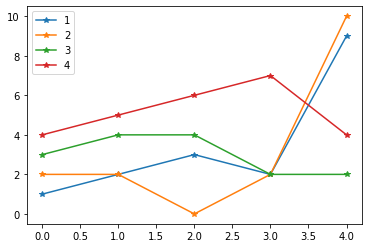

In [3]:
for col in df.columns:
    plt.plot(df[col], label=col, marker='*')
plt.legend();
plt.show();

In [4]:
banddepth([df], relax=True)

1    0.300000
2    0.233333
3    0.300000
4    0.066667
dtype: float64

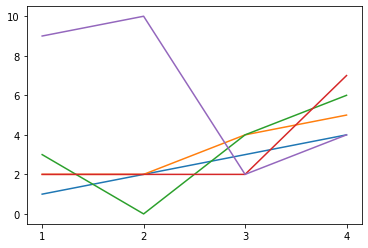

In [5]:
import matplotlib.pyplot as plt

plt.plot(df.T);

And compute its band depth

In [6]:
df = pd.DataFrame(np.random.randint(0, 10,size=(1000, 50)))
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,4,1,8,7,4,6,0,5,0,0,...,7,9,0,0,4,6,5,8,4,1
1,1,6,1,0,8,0,2,5,8,4,...,0,6,9,6,5,0,6,0,9,5
2,7,6,6,2,1,9,0,0,8,6,...,4,9,8,1,0,2,1,9,7,7
3,1,4,6,7,6,4,0,6,8,0,...,8,7,4,3,0,7,1,6,9,6
4,4,4,5,2,3,0,9,4,5,0,...,3,7,0,6,2,2,2,3,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,5,3,3,8,3,4,1,8,8,...,7,5,9,0,0,2,8,0,4,3
996,3,3,6,0,4,6,7,8,9,9,...,4,7,3,6,4,8,7,2,7,3
997,6,3,3,2,3,7,5,2,8,0,...,0,7,7,8,0,3,8,7,0,9
998,7,7,2,9,0,1,8,5,4,8,...,4,6,4,7,1,9,9,6,8,7


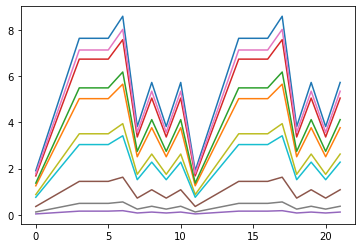

In [14]:
t = [1,2,3,4,4,4,4.5,2,3,2,3]*2
df2 = pd.DataFrame()
for col in range(10):
    df2[col] = t
    
for col in df2:
    df2[col] = df2[col] * np.random.rand() * 2
    
plt.plot(df2);

In [15]:
import plotly.express as px

px.line(df2)

In [26]:
df3 = pd.DataFrame()
df3['x_0'] = list('1    2    1    1    2')



,x_0
0,1
1,
2,
3,
4,
5,2
6,
7,
8,
9,


In [29]:
from statdepth.depth.depth import _univariate_band_depth

In [38]:
from typing import List

def resamplingbd(data: List[pd.DataFrame], K: int, J=2, containment='r2', relax=False, deep_check=False):
    samples = []

    if len(data) == 1:
        df = data[0]
        ss = df.shape[1] // K
        
        # Compute band depths with respect to each sample
        for _ in range(K):
            depths = []

            t = df.sample(n=ss, axis=1)
            df = df.drop(t.columns, axis=1)
            
            samples.append()
        
        print(samples)
        
        # Average them
        for k in range(df.shape[1]):
            t = [samples[i][k] for i in range(K)]
            depths.append(np.mean(t))

        depths = pd.Series(index=df.columns, data=depths)
        
        return depths
    


In [41]:
banddepth([df], J=2, relax=True)

0     0.416509
1     0.408750
2     0.415437
3     0.424321
4     0.414119
5     0.417762
6     0.411532
7     0.406444
8     0.415647
9     0.408753
10    0.419414
11    0.414152
12    0.415962
13    0.408516
14    0.416126
15    0.408718
16    0.420679
17    0.416577
18    0.408635
19    0.404322
20    0.410533
21    0.420321
22    0.412496
23    0.409949
24    0.415419
25    0.409953
26    0.409730
27    0.414967
28    0.412418
29    0.410984
30    0.406978
31    0.414855
32    0.416806
33    0.410798
34    0.406766
35    0.420742
36    0.415287
37    0.420252
38    0.413637
39    0.413851
40    0.411184
41    0.416131
42    0.411367
43    0.399282
44    0.416270
45    0.406069
46    0.408468
47    0.410825
48    0.411364
49    0.411138
dtype: float64